In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls')

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [4]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [7]:
## so no null values 
# here by looking into data, we can observe different columns of bill amount and pay amount can be related to each other, so we can use different classifiers
# which can bypass VIF maybe. 

In [8]:
df.columns = df.iloc[0]
df.drop(labels= 0, axis = 0, inplace = True)

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df.rename(columns = {'default payment next month': 'defaulters'}, inplace = True)

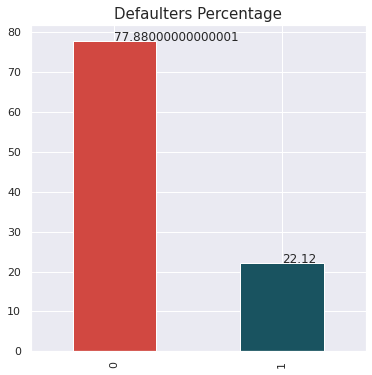

In [11]:
ax = df['defaulters'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('#d14841','#195360'))

plt.title("Defaulters Percentage", fontsize=15)
for x,y in zip([0,1],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [12]:
# so we have 22% defaulters in our dataset and 77% persons are non defaulters

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


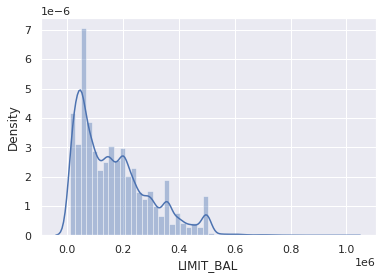

In [13]:
sns.distplot(df['LIMIT_BAL'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


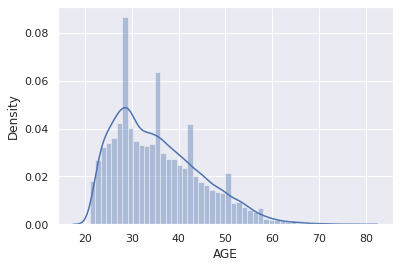

In [14]:
sns.distplot(df['AGE'])

In [15]:
# the data shows that most people are of age range 20-40 and a few only from 50-60 age group

In [16]:
# lets check the defaulters by age, sex, limit balance

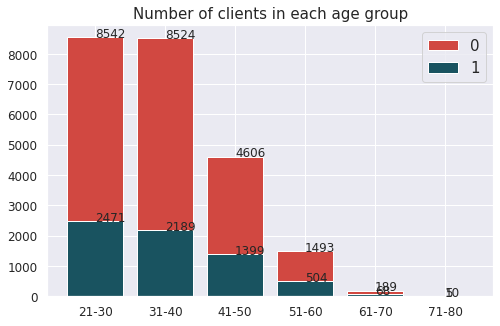

In [17]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['defaulters'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['defaulters'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0', color = ('#d14841'))
plt.bar(age_1.index, age_1.values, label='1', color = ('#195360'))
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()


In [18]:
#We have maximum clients from 21-30 age group followed by 31-40. 
#Hence with increasing age group the number of clients that will default the payment next month is decreasing.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


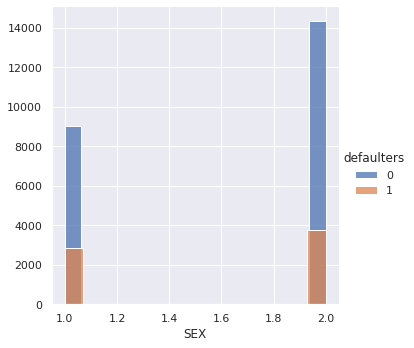

In [19]:
sns.FacetGrid(df, hue = 'defaulters', size = 5).map(sns.histplot, 'SEX').add_legend()

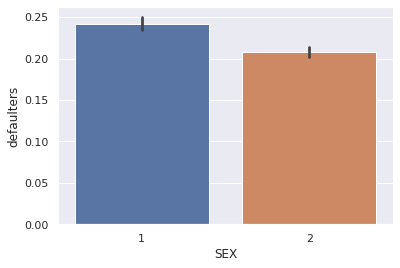

In [20]:
sns.barplot(x ='SEX', y ='defaulters', data = df)

In [21]:
# So we have more male deafulters 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Text(0.5, 1.0, 'Number of defaulters order by Sex')

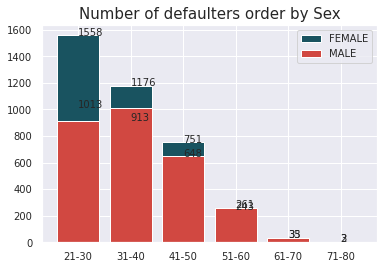

In [22]:
bins_sex = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']

sex_1 = df[df['SEX'] == 1][df['defaulters'] ==1]['AGE_BIN'].value_counts()
sex_2 = df[df['SEX'] == 2][df['defaulters'] ==1]['AGE_BIN'].value_counts()


plt.bar(sex_2.index, sex_2.values, label='FEMALE', color = ('#195360'))
plt.bar(sex_1.index, sex_1.values, label='MALE', color = ('#d14841'))

for x,y in zip(names,sex_2):
    plt.text(x,y,y,fontsize=10)

for x,y in zip(names,sex_1):
    plt.text(x,y,y,fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize= 10)

plt.legend(loc='upper right', fontsize=10)
plt.title("Number of defaulters order by Sex", fontsize=15)


In [23]:
# Number of defaulters order by Sex
# we have female defaulters more than males in 20-30 age group

In [24]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [25]:
# we should remove these 54 entries or we can fill them with 2(mode)

In [26]:
df['MARRIAGE'].replace(0,2, inplace = True)

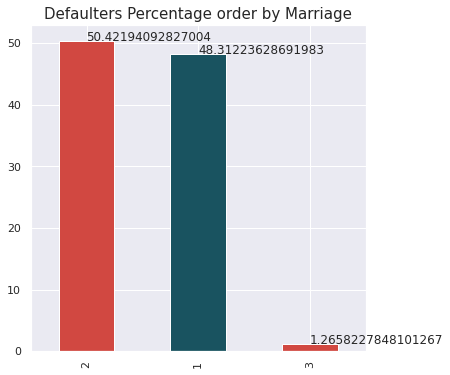

In [27]:
ax = df[df['defaulters'] == 1]['MARRIAGE'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('#d14841','#195360'))

plt.title("Defaulters Percentage order by Marriage", fontsize=15)
for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [28]:
#Defaulters Percentage order by Marriage
# We can see there is no trend or behaviour of married or unmarried people as a defaulter. 

<Figure size 720x720 with 0 Axes>

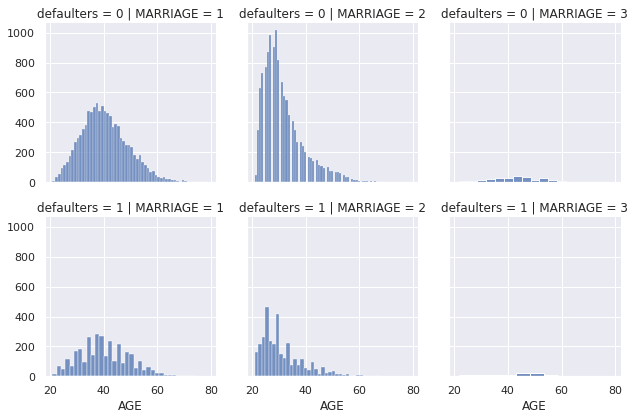

In [29]:
plt.figure(figsize=(10,10))
sns.FacetGrid(df, row='defaulters', col = 'MARRIAGE').map(sns.histplot, 'AGE')


In [30]:
# married people between the age of 30-45 have maximum chances of being defaulters, same for unmarried. So i think marriage is not the case, Age is. 

In [31]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [32]:
edu_condition =(df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 4)

In [33]:
df.loc[edu_condition, 'EDUCATION' ] = 3

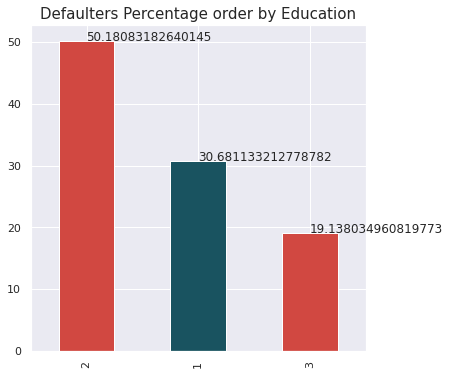

In [34]:
ax = df[df['defaulters'] == 1]['EDUCATION'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('#d14841','#195360'))

plt.title("Defaulters Percentage order by Education", fontsize=15)
for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [35]:
## University level student tend to default more followed by graduate and high school students

In [36]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters,AGE_BIN
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-30
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,21-30
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [37]:
df_final = df.drop(['AGE_BIN', 'ID'], axis = 1) ## checkpoint

In [38]:
df_final.LIMIT_BAL  = df_final.LIMIT_BAL.astype("int64")
df_final.AGE  = df_final.AGE.astype("int64")


In [39]:
df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
pd.get_dummies( columns= ['SEX', 'EDUCATION'], prefix = ['SEX', 'EDUCATION'], data = df_final, drop_first = True)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3
1,20000,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,1,0
2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,1,0
3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,1,0
4,50000,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,1,0
5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0,0,0,1
29997,150000,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0,0,0,1
29998,30000,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,0,0,1,0
29999,80000,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,0,0,0,1


In [41]:
#df_final_2 = pd.get_dummies(df_final, drop_first= True)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score 

# Classifiers

In [43]:
X = df_final.iloc[:, :-1]
Y = df_final['defaulters']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 24,stratify = Y )

In [45]:
y_train = y_train.astype('int')

In [46]:
Y = Y.astype('int')

## Random Forest

In [47]:
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [48]:
classifier.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
classifier.best_params_

{'max_depth': 11, 'n_estimators': 80}

### Testing Accuracy 

In [50]:
pred = classifier.predict(x_test)

In [51]:
y_test = y_test.astype('int')

In [52]:
accuracy_score(y_test,pred)

0.819

In [53]:
classifier.predict_proba(x_test)

array([[0.89813431, 0.10186569],
       [0.82349571, 0.17650429],
       [0.42956491, 0.57043509],
       ...,
       [0.782857  , 0.217143  ],
       [0.88818093, 0.11181907],
       [0.90978372, 0.09021628]])

In [54]:
roc_auc_score(y_test,pred)

0.6612220695425032

In [61]:
from sklearn.metrics import recall_score

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [63]:
print(classification_report(pred, y_test))
print(confusion_matrix( y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5237
           1       0.38      0.66      0.48       763

    accuracy                           0.82      6000
   macro avg       0.66      0.75      0.69      6000
weighted avg       0.87      0.82      0.84      6000

[[4412  261]
 [ 825  502]]


In [64]:
recall_score(y_test, pred)

0.37829691032403917

In [65]:
# so 37% recall only

# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
neighbors = np.arange(1,9)
Train_accuracy = np.empty(len(neighbors))
Test_accuracy = np.empty(len(neighbors))

for i, K in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = K)
  knn.fit(x_train,y_train)
  Train_accuracy[i] = knn.score(x_train,y_train)
  Test_accuracy[i] = knn.score(x_test,y_test)



In [68]:
Train_accuracy

array([0.99945833, 0.842125  , 0.84170833, 0.81533333, 0.81554167,
       0.80270833, 0.80516667, 0.79716667])

In [69]:
Test_accuracy

array([0.6915    , 0.7685    , 0.74116667, 0.771     , 0.75616667,
       0.77166667, 0.76483333, 0.77433333])

In [70]:
classifier_knn = KNeighborsClassifier()
grid_values_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}
classifier_knn = RandomizedSearchCV(classifier_knn, param_distributions = grid_values_knn, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier_knn.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [71]:
classifier_knn.best_params_

{'n_neighbors': 10}

In [72]:
pred_knn = classifier_knn.predict(x_test)

In [73]:
print("Accuracy score %s" %accuracy_score(y_test,pred_knn))
#print("F1 score %s" %f1_score(y_test,pred_knn))
print("Classification report  \n %s" %(classification_report(y_test, pred_knn)))

Accuracy score 0.7731666666666667
Classification report  
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      4673
           1       0.44      0.10      0.16      1327

    accuracy                           0.77      6000
   macro avg       0.62      0.53      0.52      6000
weighted avg       0.71      0.77      0.71      6000



In [74]:
print(confusion_matrix( y_test, pred_knn))

[[4507  166]
 [1195  132]]


In [75]:
roc_auc_score(y_test,pred_knn)

0.5319746379294802

In [76]:
recall_score(y_test,pred_knn)

0.09947249434815374

In [77]:
#large unbalanced dataset, so KNN is giving low accuracy

# Implementing SMOT

In [78]:
X.shape

(30000, 23)

In [79]:
Y.shape

(30000,)

In [80]:
Y.value_counts()

0    23364
1     6636
Name: defaulters, dtype: int64

In [81]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, Y_sm = smote.fit_sample(X, Y)
# summarize the new class distribution
counter = Counter(Y_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [82]:
counter

Counter({0: 23364, 1: 23364})

In [83]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,Y_sm, test_size = 0.2, random_state = 24,stratify = Y_sm)

## Random Forest with SMOT

In [84]:
classifier_sm = RandomForestClassifier() 
grid_values_sm = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
classifier = GridSearchCV(classifier, param_grid = grid_values_sm, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier_sm.fit(x_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
pred_sm = classifier_sm.predict(x_test_sm)

In [86]:
roc_auc_score(y_test_sm,pred_sm)

0.8772736999786004

In [87]:
accuracy_score(y_test_sm,pred_sm)

0.8772736999786005

In [88]:
confusion_matrix(y_test_sm,pred_sm)

array([[4322,  351],
       [ 796, 3877]])

In [89]:
recall_score(y_test_sm,pred_sm)

0.8296597474855553

## KNN with SMOT

In [90]:
# Fit the object to train dataset
classifier_knn.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [91]:
pred_knn_sm = classifier_knn.predict(x_test_sm)

In [92]:
roc_auc_score(y_test_sm,pred_knn_sm)

0.8099721806120266

In [93]:
accuracy_score(y_test_sm,pred_knn_sm)

0.8099721806120266

In [94]:
confusion_matrix(y_test_sm,pred_knn_sm)

array([[3738,  935],
       [ 841, 3832]])

In [95]:
recall_score(y_test_sm,pred_knn_sm)

0.8200299593408945